In [2]:
import librosa
filename2='D:/study/datasets/Audio/UrbanSound8K/audio/fold2/4201-3-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(filename2)


In [3]:
print(librosa_sample_rate)
print(librosa_audio_data)

22050
[ 0.          0.          0.         ... -0.03159269 -0.08477292
 -0.11285392]


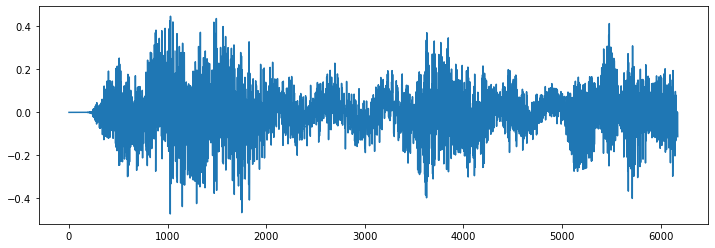

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()


In [5]:
from scipy.io import wavfile as wav

filename2='D:/study/datasets/Audio/UrbanSound8K/audio/fold2/4201-3-1-0.wav'
wave_sample_rate, wave_audio=wav.read(filename2)
print(wave_sample_rate)
print(wave_audio)


44100
[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [-3591 -3050]
 [-3659 -3469]
 [-3279 -3609]]


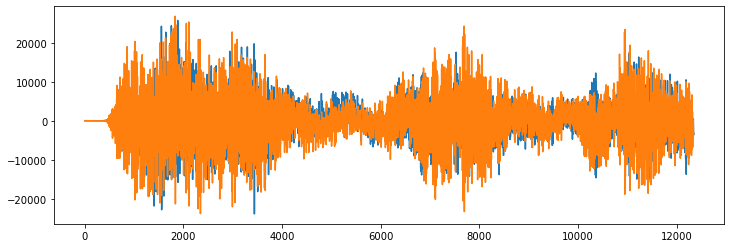

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()


In [7]:
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfcc.shape)
# print(mfcc)

(40, 13)
[[-2.26635300e+02 -1.44228348e+02 -9.84457321e+01 -8.85334473e+01
  -1.05705269e+02 -1.28634369e+02 -1.28932755e+02 -1.26266014e+02
  -1.33399826e+02 -1.52011124e+02 -1.55454819e+02 -1.32771912e+02
  -1.30280823e+02]
 [-1.15314455e+01 -9.91077781e-01  1.57328663e+01  3.60566711e+01
   5.46181564e+01  6.25944824e+01  5.98024292e+01  3.33883629e+01
   1.08252888e+01  1.03598042e+01  1.01872463e+01  1.40427899e+00
  -6.32007551e+00]
 [ 1.38931999e+01  2.44846046e-02 -1.74192848e+01 -3.86316948e+01
  -4.94583969e+01 -3.91957436e+01 -2.06632156e+01 -1.86926498e+01
  -2.43051300e+01 -2.19019794e+01 -2.49867630e+01 -3.76491394e+01
  -4.50592194e+01]
 [ 8.92042007e+01  8.19660416e+01  7.65883636e+01  7.36514435e+01
   6.07202530e+01  4.84300575e+01  5.18797112e+01  6.69149780e+01
   8.21712189e+01  7.37960205e+01  6.92402649e+01  7.95679779e+01
   8.08782043e+01]
 [-3.41699638e+01 -4.51768646e+01 -5.56693192e+01 -5.27914581e+01
  -4.79911156e+01 -4.35140991e+01 -5.00580139e+01 -5.0254

In [8]:
from librosa.feature.spectral import mfcc
import pandas as pd
import os
import librosa
import numpy as  np
from tqdm import tqdm

In [61]:
audio_dataset_path="D:/study/datasets/Audio/UrbanSound8K/audio/"
metadata=pd.read_csv("D:/study/datasets/Audio/UrbanSound8K/metadata/UrbanSound8K.csv")
print(metadata.head())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [62]:
def features_extractor(filename):
    audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features,axis=0)

    return mfccs_scaled_features

In [97]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:01, 19.95it/s]c:\users\damit\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [07:15, 24.89it/s]c:\users\damit\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
c:\users\damit\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [07:34, 19.19it/s]


In [98]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-10.315169, -9.331447, -8.811516, -9.197085, ...",dog_bark
1,"[-6.5107155, -5.8588877, -6.541186, -6.7805605...",children_playing
2,"[-7.7621927, -6.2912607, -5.369538, -6.3687167...",children_playing
3,"[-5.881464, -6.5208197, -7.5027113, -7.0779314...",children_playing
4,"[-6.269862, -5.931375, -5.8958206, -6.4093018,...",children_playing


In [99]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [100]:
print(y.shape)
y

(8732,)


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [72]:
y=np.array(pd.get_dummies(y))

In [93]:
x.shape
# y.shape

(8732,)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
X_train

array([array([-1.5083668, -2.58658  , -3.9799702, -4.018836 , -3.640515 ,
       -3.7546134, -4.007915 , -3.5227752, -2.9109426, -3.0018497,
       -3.7284367, -3.112412 , -2.5409665, -3.4274375, -3.239591 ,
       -3.3099067, -3.683773 , -3.4683883, -4.275266 , -3.5874577,
       -3.482428 , -3.6738987, -4.480592 , -4.549062 , -4.2544475,
       -3.8878932, -2.5615897, -2.720574 , -3.5593827, -3.1972346,
       -3.5182006, -3.5990925, -3.2747982, -2.4685678, -2.2898006,
       -2.8058667, -2.7572856, -3.223575 , -3.3839195, -3.805848 ,
       -3.3080528, -3.443721 , -3.6861262, -3.480727 , -3.477014 ,
       -3.8191624, -3.6728916, -3.080093 , -2.88062  , -3.5117455,
       -4.0221796, -3.8467166, -4.0686426, -3.9259338, -3.9318986,
       -4.4567432, -3.4944012, -3.513537 , -3.8060944, -4.2724433,
       -4.6319237, -4.4158115, -3.8778234, -4.5740385, -3.7464352,
       -3.1442294, -3.6489959, -4.460629 , -3.4014976, -3.3054852,
       -3.895478 , -4.1291876, -4.0899563, -4.421044 , 

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6985,)
(1747,)
(6985, 10)
(1747, 10)


In [77]:
###model Creation

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [79]:
print(tf.__version__)

2.3.1


In [80]:
num_labels=y.shape[1]

In [81]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_8 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)              

In [83]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [84]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


In [85]:
num_epochs=100
num_batch_size=32

In [86]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [87]:
# start=datetime.now()
model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=1)
# duration=datetime.now-start

# print("Training completed in tie:",duration)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).